In [4]:
import os
import sys

import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


In [5]:
DIRPATH = '/home/apbarret/Data/CMIP6/siconc/SImon/CESM2/historical/r11i1p1f1'
filepath = os.path.join(DIRPATH, 'siconc_SImon_CESM2_historical_r11i1p1f1_gn_200001-201412.nc')

In [9]:
with xr.open_dataset('../siconc_SImon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc') as ds:
    dsClm = ds.groupby('time.month').mean(dim='time')
    
dsClm

/home/apbarret/anaconda3/envs/CMIP6/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:             (bnds: 2, month: 12, vertices: 4, x: 360, y: 363)
Coordinates:
    type                |S7 b'sea_ice'
    longitude           (y, x) float64 80.0 81.0 82.0 83.0 ... 80.0 80.0 80.0
    latitude            (y, x) float64 -78.0 -78.0 -78.0 ... 65.29 64.86 64.43
  * x                   (x) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * y                   (y) float64 -78.0 -77.5 -77.0 ... 149.7 151.8 154.0
  * month               (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds, vertices
Data variables:
    y_bnds              (month, y, bnds) float64 -78.25 -77.75 ... 152.9 155.1
    x_bnds              (month, x, bnds) float64 -0.5 0.5 0.5 ... 358.5 359.5
    vertices_latitude   (month, y, x, vertices) float64 -77.75 -77.75 ... 64.22
    vertices_longitude  (month, y, x, vertices) float64 80.5 79.5 ... 79.99
    siconc              (month, y, x) float32 nan nan nan nan ... nan nan nan

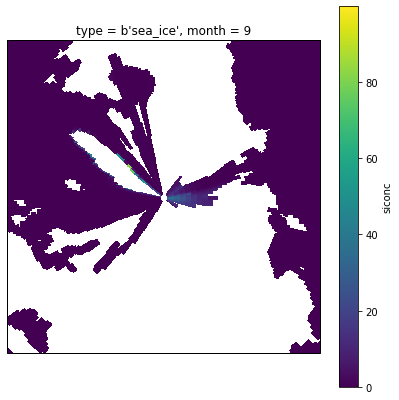

In [16]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
dsClm.siconc.sel(month=9).plot(ax=ax, transform=ccrs.PlateCarree())

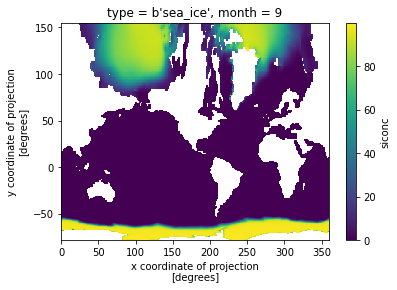

In [17]:
dsClm.siconc.sel(month=9).plot()